In [2]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv('analystFinal2.csv')

In [4]:
df.head()

,id,Nombre de trabajo,Compania,Salario,Categoria,Subcategoria,Localidad,Activo desde,Jornada,Tipo de contrato
0,0,Se necesita personal de 17 a 35 años,EMPLEOS EN GUAYAQUIL,"$ 500,00 (Mensual)",Almacenamiento / Logística / Distribución,Oficios y Profesiones,Guayaquil,16/08/2020 - 14:32:54 pm,Tiempo completo,Contrato a Plazo Indeterminado
1,1,Auxiliar de bodega,PARTESCAT,"500,00 US$ (Neto mensual)",Almacenamiento / Logística / Distribución,Logística y Distribución,Quito,16/08/2020 - 12:46:40 pm,Tiempo Completo,Otro tipo de contrato
2,2,Chofer y oficial,Pluproxsa S.A.,"406,00 US$ (Neto mensual)",Almacenamiento / Logística / Distribución,Logística y Distribución,Guayaquil,16/08/2020 - 12:46:36 pm,Tiempo Completo,Contrato por tiempo indefinido
3,3,Mecánico Motocicletas,MULTIMOTOS S. A.,"394,00 US$ (Neto mensual)",Almacenamiento / Logística / Distribución,Mantenimiento y Reparaciones,Portoviejo,16/08/2020 - 12:25:27 pm,Tiempo Completo,Contrato por tiempo indefinido
4,4,Mecánico,CONFIDENCIAL,A convenir,Almacenamiento / Logística / Distribución,Mantenimiento y Reparaciones,Manta,16/08/2020 - 12:25:22 pm,Tiempo Completo,Contrato por tiempo indefinido


In [5]:
df['Categoria'].unique()

array(['Almacenamiento / Logística / Distribución',
       'Comercial / Ventas / Atención al Cliente',
       'Diseño / Decoración / Artes Gráficas',
       'Recursos Humanos / Relaciones Públicas',
       'Informática / Telecomunicaciones', 'Medicina / Salud',
       'Producción / Mantenimiento / Operaciones',
       'Marketing / Publicidad / Producción Audiovisual',
       'Legal / Asesoría', 'Arquitectura / Ingenierías',
       'Hotelería / Turismo', 'Docencia / Educación',
       'Compras / Comercio Exterior',
       'Construcción / Obras / Edificaciones',
       'Administración / Contabilidad / Finanzas'], dtype=object)

In [6]:
df['Jornada'].unique()

array(['Tiempo completo', 'Tiempo Completo', 'Medio Tiempo', 'Por Horas',
       'Desde casa', 'Desde Casa', 'Beca/Prácticas', 'Tiempo parcial',
       'Por horas'], dtype=object)

In [7]:
dfSNA1 = df[['Categoria', 'Jornada']]

In [8]:
dfSNA1.head()

,Categoria,Jornada
0,Almacenamiento / Logística / Distribución,Tiempo completo
1,Almacenamiento / Logística / Distribución,Tiempo Completo
2,Almacenamiento / Logística / Distribución,Tiempo Completo
3,Almacenamiento / Logística / Distribución,Tiempo Completo
4,Almacenamiento / Logística / Distribución,Tiempo Completo


In [9]:
dfSNA1['Categoria'] = dfSNA1['Categoria'].apply(lambda x: x.upper())
dfSNA1['Jornada'] = dfSNA1['Jornada'].apply(lambda x: x.upper())

<ipython-input-9-be1567fb15ce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfSNA1['Categoria'] = dfSNA1['Categoria'].apply(lambda x: x.upper())
<ipython-input-9-be1567fb15ce>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfSNA1['Jornada'] = dfSNA1['Jornada'].apply(lambda x: x.upper())


In [10]:
dfSNA1.head()

,Categoria,Jornada
0,ALMACENAMIENTO / LOGÍSTICA / DISTRIBUCIÓN,TIEMPO COMPLETO
1,ALMACENAMIENTO / LOGÍSTICA / DISTRIBUCIÓN,TIEMPO COMPLETO
2,ALMACENAMIENTO / LOGÍSTICA / DISTRIBUCIÓN,TIEMPO COMPLETO
3,ALMACENAMIENTO / LOGÍSTICA / DISTRIBUCIÓN,TIEMPO COMPLETO
4,ALMACENAMIENTO / LOGÍSTICA / DISTRIBUCIÓN,TIEMPO COMPLETO


In [11]:
G = nx.DiGraph()
for index, row in dfSNA1.iterrows():    
    G.add_edge(row['Categoria'], row['Jornada'])
    G[row['Categoria']][row['Jornada']]['weight'] = G[row['Categoria']][row['Jornada']].get('weight', 0) + 1

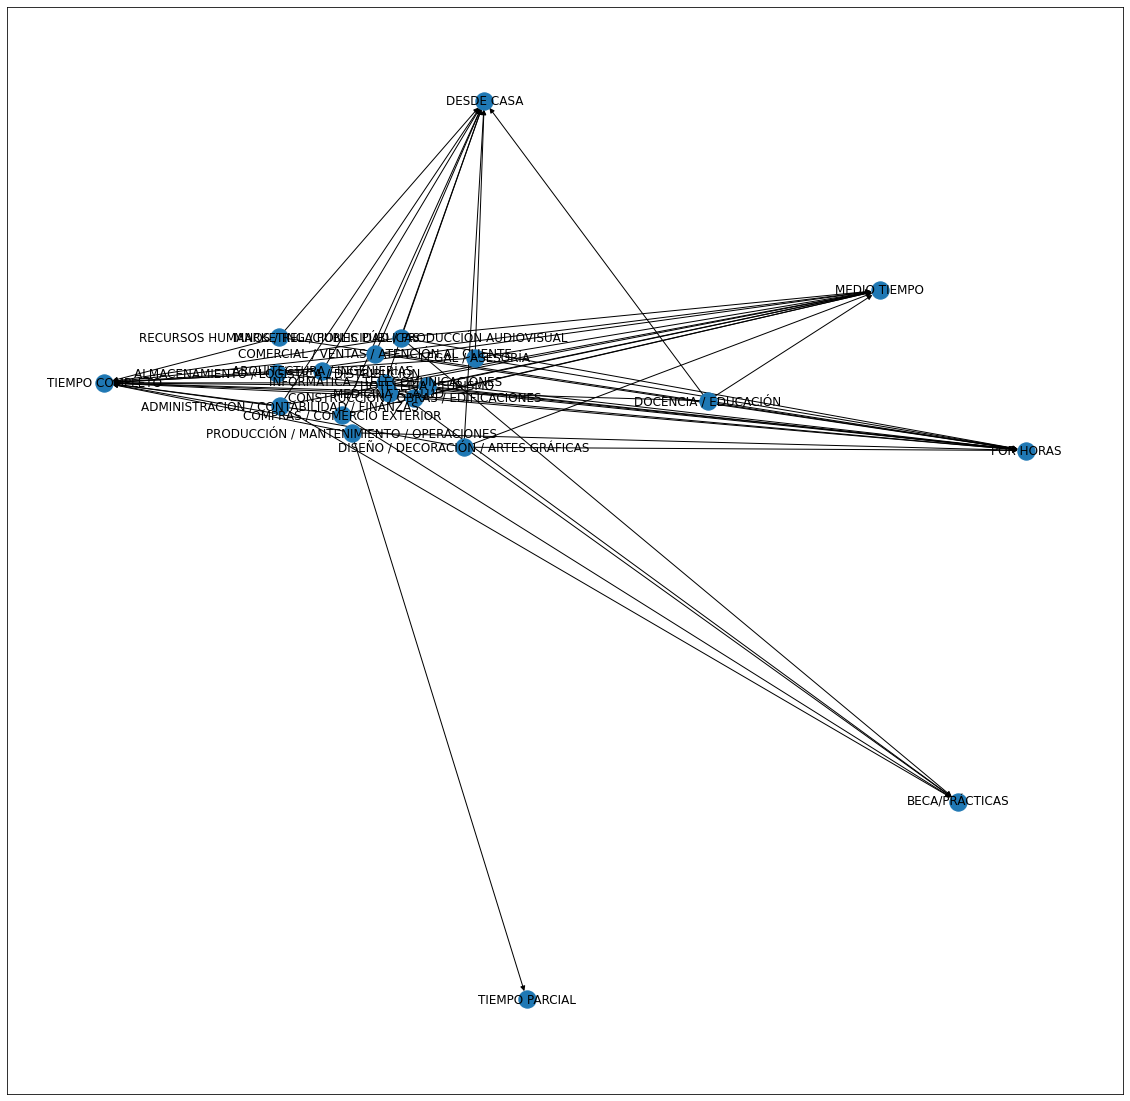

In [12]:
plt.figure(figsize=(20, 20))
nx.spring_layout(G)
nx.draw_networkx(G)

In [13]:
nx.to_dict_of_dicts(G)

{'ALMACENAMIENTO / LOGÍSTICA / DISTRIBUCIÓN': {'TIEMPO COMPLETO': {'weight': 112},
  'MEDIO TIEMPO': {'weight': 6},
  'POR HORAS': {'weight': 2}},
 'TIEMPO COMPLETO': {},
 'MEDIO TIEMPO': {},
 'POR HORAS': {},
 'COMERCIAL / VENTAS / ATENCIÓN AL CLIENTE': {'TIEMPO COMPLETO': {'weight': 151},
  'MEDIO TIEMPO': {'weight': 27},
  'DESDE CASA': {'weight': 13},
  'POR HORAS': {'weight': 9}},
 'DESDE CASA': {},
 'DISEÑO / DECORACIÓN / ARTES GRÁFICAS': {'TIEMPO COMPLETO': {'weight': 17},
  'DESDE CASA': {'weight': 1},
  'POR HORAS': {'weight': 3},
  'BECA/PRÁCTICAS': {'weight': 3},
  'MEDIO TIEMPO': {'weight': 2}},
 'BECA/PRÁCTICAS': {},
 'RECURSOS HUMANOS / RELACIONES PÚBLICAS': {'POR HORAS': {'weight': 1},
  'DESDE CASA': {'weight': 4},
  'TIEMPO COMPLETO': {'weight': 26}},
 'INFORMÁTICA / TELECOMUNICACIONES': {'MEDIO TIEMPO': {'weight': 2},
  'TIEMPO COMPLETO': {'weight': 61},
  'POR HORAS': {'weight': 9},
  'DESDE CASA': {'weight': 7},
  'BECA/PRÁCTICAS': {'weight': 1}},
 'MEDICINA / SALUD

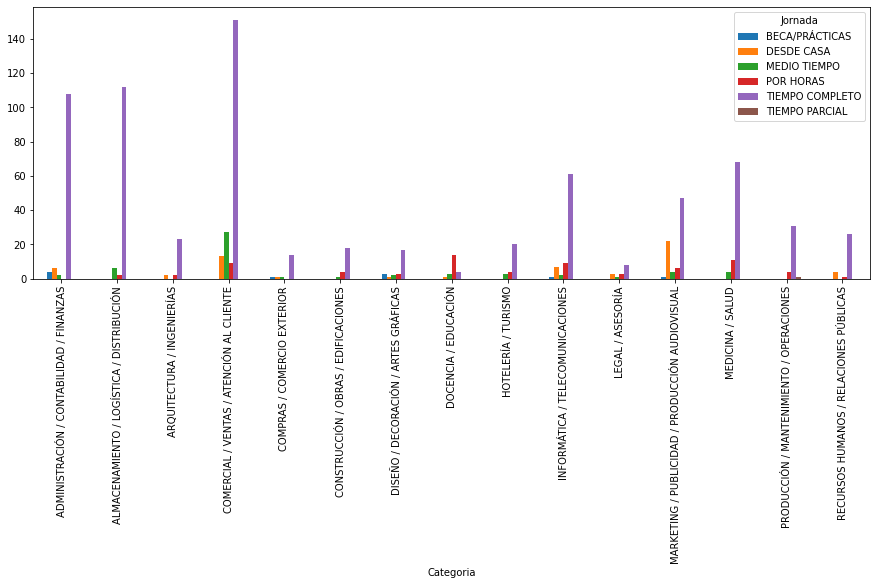

In [14]:
# plt.figure(figsize=(60, 20))
dfSNA1.groupby('Jornada').Categoria.value_counts().unstack(0).plot(kind='bar', figsize=(15, 5))
plt.show()